In [120]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [165]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')

In [107]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([  37.,  515.,  323.,  316.,  173.,  119.,   87.,   21.,    7.,    1.]),
 array([  8.4 ,   9.05,   9.7 ,  10.35,  11.  ,  11.65,  12.3 ,  12.95,
         13.6 ,  14.25,  14.9 ]),
 <a list of 10 Patch objects>)

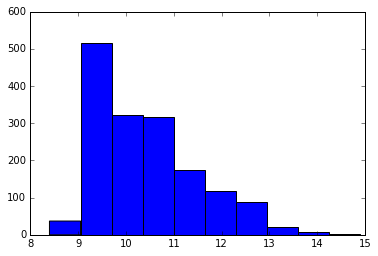

In [108]:
plt.hist(wine_df['alcohol'])


In [109]:
wino = wine_df.groupby('quality')

In [110]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [111]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [112]:
wine_df['qual:alc'] = wine_df['quality'] / wine_df['alcohol']


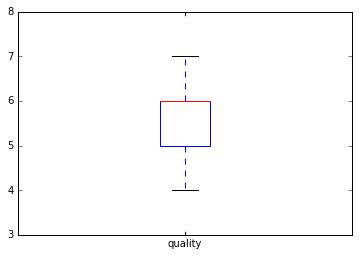

In [113]:
wine_df['quality'].plot(kind='box')

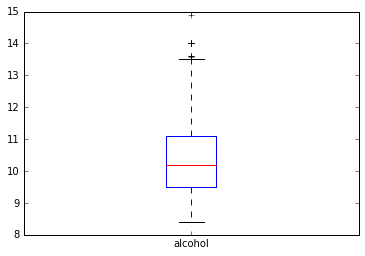

In [114]:
wine_df['alcohol'].plot(kind='box')

In [115]:
wine_df.sort('alcohol', ascending=False, inplace=True)

/Users/dhrumindesai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [116]:
wine_df.groupby('quality')

In [117]:
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [118]:
wine_df = wine_df.groupby('quality').apply(ranker)

In [119]:
wine_df[wine_df['alc_content_rank']== 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual:alc,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1


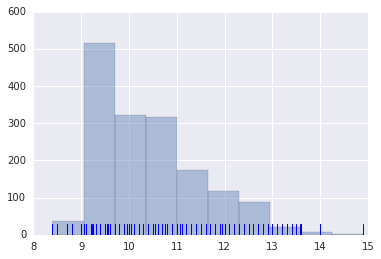

In [122]:
alc_data = wine_df.alcohol
plt.hist(alc_data,alpha=0.4)
sns.rugplot(alc_data)

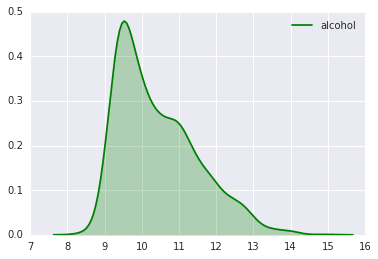

In [161]:
sns.kdeplot(alc_data,shade=True, color = "green")

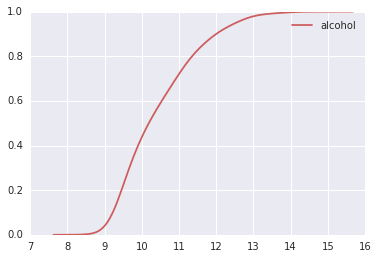

In [127]:
sns.kdeplot(alc_data, cumulative=True, color = 'indianred')

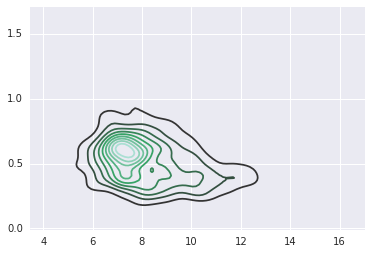

In [130]:
sns.kdeplot(wine_df)

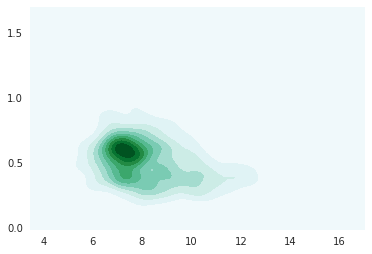

In [132]:
sns.kdeplot(wine_df,shade=True)

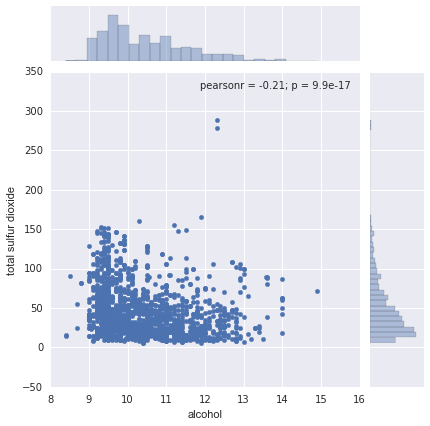

In [137]:
sns.jointplot(alc_data, wine_df['total sulfur dioxide'])

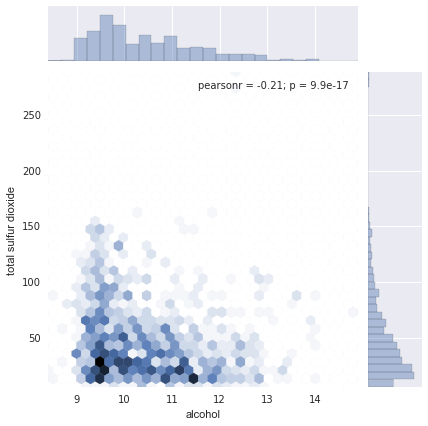

In [138]:
sns.jointplot(alc_data, wine_df['total sulfur dioxide'], kind='hex')

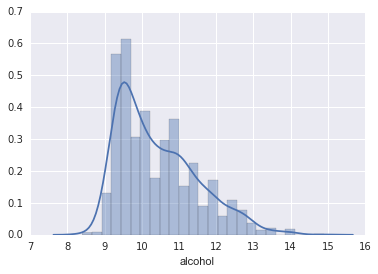

In [140]:
sns.distplot(alc_data,bins=25)

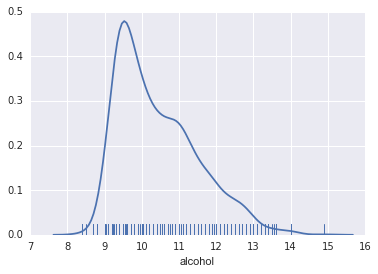

In [144]:
sns.distplot(alc_data,bins=25,rug=True,hist=False)

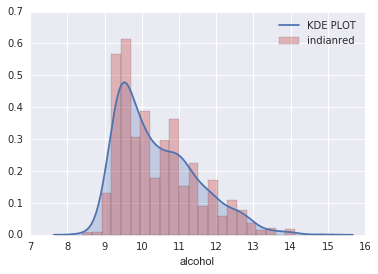

In [145]:
sns.distplot(alc_data,bins=25, kde_kws={'shade': True, 'label':'KDE PLOT'}, hist_kws={'color':'indianred', 'label': 'indianred'})

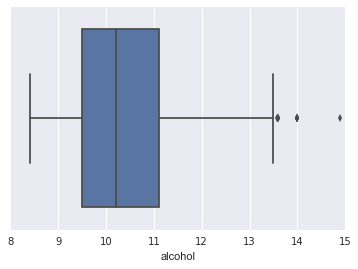

In [151]:
sns.boxplot(alc_data)

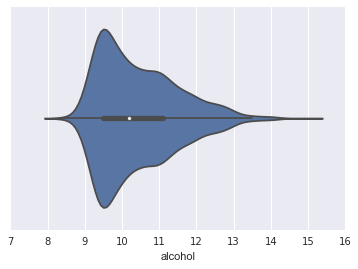

In [152]:
sns.violinplot(alc_data)

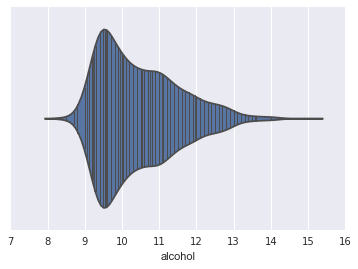

In [153]:
sns.violinplot(alc_data, inner='stick')

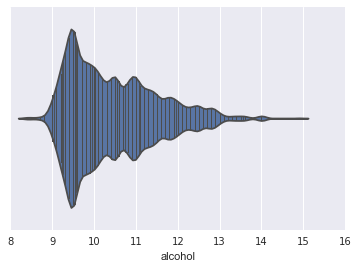

In [155]:
sns.violinplot(alc_data, inner='stick', bw=0.1)

In [174]:
sns.boxplot(x = wine_df['quality'], y = wine_df.alcohol, data = wine_df)

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

In [175]:
wine_df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64